<a href="https://colab.research.google.com/github/preetamjumech/DL_DNN_from_Scratch/blob/main/Preetam_Saha_26_09_2022_Avila_dataset_DNN_normal_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/avila-tr.txt",header = None)
train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [ ]:
train.shape

(10430, 11)

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/avila-ts.txt",header = None)
test.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A


In [ ]:
test.shape

(10437, 11)

In [ ]:
train.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [ ]:
train[10].value_counts()

A    4286
F    1961
E    1095
I     831
X     522
H     519
G     446
D     352
Y     266
C     103
W      44
B       5
Name: 10, dtype: int64

In [ ]:
d={'A':0, 'F':1, 'H':2, 'E':3, 'I':4, 'Y':5, 'D':6, 'X':7, 'G':8, 'W':9, 'C':10, 'B':11}

In [ ]:
X_train=train.drop(10,axis=1)
X_test=test.drop(10,axis=1)
y_train=train.iloc[:,-1]
y_test=test.iloc[:,-1]

In [ ]:
y_train=y_train.map(d)
y_test=y_test.map(d)

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652


In [ ]:
y_train

0        0
1        0
2        0
3        0
4        1
        ..
10425    1
10426    1
10427    0
10428    3
10429    7
Name: 10, Length: 10430, dtype: int64

In [ ]:
import torch  

In [ ]:
X_train.shape

(10430, 10)

In [ ]:
y_train.shape

(10430,)

In [ ]:
X_train = torch.tensor(X_train.values)
X_test = torch.tensor(X_test.values)
y_train=torch.tensor(y_train.values)
y_test=torch.tensor(y_test.values)

In [ ]:
X_train.shape

torch.Size([10430, 10])

In [ ]:
y_train.reshape(-1,1)

tensor([[0],
        [0],
        [0],
        ...,
        [0],
        [3],
        [7]])

In [ ]:
y_test.reshape(-1,1)

tensor([[9],
        [0],
        [4],
        ...,
        [0],
        [1],
        [2]])

In [ ]:
import torch,torchsummary
import torch.nn as nn
import torch.nn.functional as F 
from torch.utils.data import DataLoader,TensorDataset 
from torch.optim import Adam,RMSprop 

In [ ]:
train_loader=DataLoader(TensorDataset(X_train.float(),y_train),batch_size=64,shuffle=True)
val_loader=DataLoader(TensorDataset(X_test.float(),y_test),batch_size=64)

In [ ]:
class MNIST_DNN(nn.Module): #nn.module its the class, all the layers,activation are inheriting
  def __init__(self):
    super(MNIST_DNN,self).__init__() #this line linkds MNIST_DNN to nn.module by calling __init__()
    self.h1 = nn.Linear(in_features=10,out_features=512) #linear means here dense in torch like dense in tensorflow
    self.h2 = nn.Linear(in_features=512,out_features=256)
    self.bn = nn.BatchNorm1d(num_features=256) #1D array Iam supplying, so 1D batchnormalization, if I have to supply a pic, 2D, then it will be 2D
    self.h3 = nn.Linear(in_features=256,out_features=128)
    self.dropout = nn.Dropout(p=0.40) #at random 30 percent will be dropout between h3 and h4 , to make model model robust, for regulazation we dropout
    self.h4 = nn.Linear(in_features=128,out_features=32)
    self.out = nn.Linear(in_features=32,out_features=12) #dont shrink less than 10(10 classes are there, that will be severely underfitting)

  # def forward(self,x):
  #   x = self.h1(x)
  #   x = F.relu(x)
  #   x = self.dropout(x)  #no parameter for dropout

  #   x = F.relu(self.h2(x))

  #   x = self.bn(x) #for initialization of bn , two parametres gamma and beta so, initialize every time
  #   x = F.relu(self.h3(x))
  #   x = self.dropout(x)

  #   x = F.relu(self.h4())

  #   x = F.relu(self.out(x))
  #   #x = torch.softmax(x,dim=1)

  #   return x
  def forward(self,x):
    x=self.h1(x)
    x=F.relu(x)
    x=self.dropout(x)
    x=F.relu(self.h2(x))

    x=self.bn(x)
    x=F.relu(self.h3(x))
    x=self.dropout(x)

    x=F.relu(self.h4(x))
    x=self.dropout(x)

    x=self.out(x)
    #x=torch.softmax(x,dim=1)

    return x

In [ ]:
model_DNN =  MNIST_DNN()

In [ ]:
list(model_DNN.parameters())

[Parameter containing:
 tensor([[-0.0116, -0.0914, -0.1115,  ..., -0.2441, -0.2478,  0.0290],
         [-0.2425,  0.1608, -0.3079,  ..., -0.0040,  0.2415,  0.1512],
         [-0.2615,  0.1510, -0.0456,  ...,  0.0361,  0.0371, -0.1421],
         ...,
         [-0.1108,  0.1891, -0.0258,  ...,  0.1640,  0.0951, -0.1426],
         [ 0.2457,  0.2773,  0.2226,  ..., -0.1340,  0.0074,  0.2709],
         [-0.1523, -0.2768, -0.0461,  ..., -0.1015, -0.1909, -0.0898]],
        requires_grad=True), Parameter containing:
 tensor([-7.4657e-02, -2.4829e-01, -2.9294e-01, -3.4230e-03,  2.8197e-01,
         -8.4700e-02, -1.5267e-03,  4.3558e-02, -3.1382e-02,  2.4568e-01,
          2.3095e-02,  1.9065e-02,  8.7973e-02,  1.3890e-01,  2.5520e-01,
         -2.8776e-01,  2.0556e-01,  2.5096e-01,  2.9646e-01,  2.8868e-01,
          2.9379e-01, -3.1461e-01, -1.6510e-01, -3.0523e-01, -1.9506e-01,
          2.3446e-02, -2.5593e-01,  2.4659e-01, -2.6441e-01,  1.5042e-01,
         -3.1509e-01,  1.7991e-01, -1.915

In [ ]:
opt = Adam(model_DNN.parameters(),lr = 0.001)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
model_DNN = model_DNN.to(device)

In [ ]:
#it gives more flexibility in fit , learning arte itself can be chnaged, so torch is more flexible than tensorflow
for epoch in range(30):
  training_loss = 0.0
  for batch, target in train_loader: #train_loader is a generator (bathc=mini batch,target = target)
    batch=batch.to(device) #batch is a tensor,(not numpy) so can be shifted to gpu
    target = target.to(device)
    #print(batch.shape)
    
    #---- The Learning Phase ------#
    opt.zero_grad() #removing all the calculated residual gradients after every batch, each batch is independent, gradients are calculated newly
    output =  model_DNN(batch) #calculating output
    loss = F.cross_entropy(output,target) #in torch just cross entropy
    loss.backward() #gradients are calcuated, whether it is rmsProp, Adam anything
    opt.step() #weights are upodated
    #---- The Learning Phase ------#
    training_loss += loss.item() #actual value of loss
  
  val_loss = 0.0
  for val_batch, val_target in val_loader:
    val_batch = val_batch.to(device)
    val_target = val_target.to(device)
    pred = model_DNN(val_batch)
    loss_val = F.cross_entropy(pred,val_target)
    val_loss += loss_val.item()

  if (epoch+1) % 5 ==0:
    print(f"Training Loss: {training_loss}")
    print(f"Test Loss: {val_loss}")

Training Loss: 161.51701563596725
Test Loss: 159.2101093530655
Training Loss: 134.8263509273529
Test Loss: 142.12072199583054
Training Loss: 119.99192011356354
Test Loss: 127.5256073474884
Training Loss: 109.86055526137352
Test Loss: 115.5653305053711
Training Loss: 98.34804916381836
Test Loss: 106.22634190320969
Training Loss: 89.12987670302391
Test Loss: 101.24837929010391


In [ ]:
torchsummary.summary(model_DNN,input_size=(X_train.shape[1],),device="cpu",batch_size=-1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]           5,632
           Dropout-2                  [-1, 512]               0
            Linear-3                  [-1, 256]         131,328
       BatchNorm1d-4                  [-1, 256]             512
            Linear-5                  [-1, 128]          32,896
           Dropout-6                  [-1, 128]               0
            Linear-7                   [-1, 32]           4,128
           Dropout-8                   [-1, 32]               0
            Linear-9                   [-1, 12]             396
Total params: 174,892
Trainable params: 174,892
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.67
Estimated Total Size (MB): 0.68
-------------------------------------------

In [ ]:
final_pred=model_DNN(X_test.float())

In [ ]:
final_pred[0:2]

tensor([[  0.5003,  -0.4792,  -1.5550,  -0.4160,  -1.6517,   0.0915,  -0.5602,
          -0.0318,  -0.6324,  -0.0961,  -1.7845,  -1.9078],
        [  2.0822,  -0.8166,  -0.3902,  -0.5050,  -1.9838,  -4.7136,  -3.8024,
          -0.9431,  -8.6184,  -4.6329,  -2.4343, -12.7596]],
       grad_fn=<SliceBackward0>)

In [ ]:
preds=np.argmax(final_pred.detach().numpy(),axis=1)

In [ ]:
preds

array([0, 0, 4, ..., 0, 1, 0])

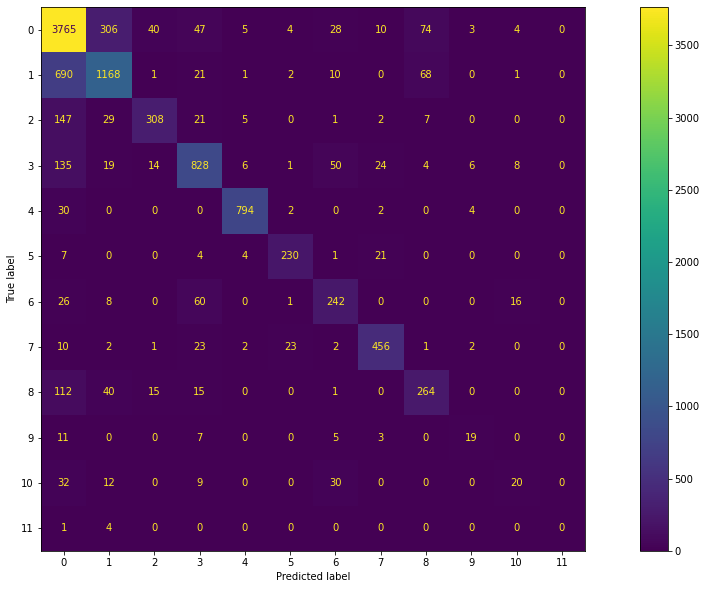

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
cm=confusion_matrix(y_test,preds)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
accuracy_score(y_test,preds)

0.7755102040816326